In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv("modified_h3_summary.csv")

# 스타일 설정
sns.set(style="whitegrid")

# case 컬럼을 범주형으로 정렬
case_order = [0, 1, 2, 3]
df['case'] = pd.Categorical(df['case'], categories=case_order, ordered=True)

In [36]:
df

,trial,hot_compaction,cold_compaction,time(s),hot_column_key,default_column_key,rocksdb.bytes.written,rocksdb.flush.write.bytes,rocksdb.block.cache.hit,rocksdb.block.cache.miss,...,rocksdb.number.keys.read,rocksdb.wal.bytes,rocksdb.write.wal,rocksdb.memtable.hit,rocksdb.memtable.miss,rocksdb.compaction.key.drop.new.1,rocksdb.bytes.read,WAF,RAF,case
0,1,universal,universal,215.646,88822,543645,16407028699,811590816,7283687,5877595,...,1911178,16407028699,1000000,3778,1907400,194636,10362339328,0.279132,0.330930,1
1,2,universal,level,309.711,88818,543256,16407029052,811597848,8060048,10189216,...,1911182,16407029052,1000000,3839,1907343,241541,10355900416,0.494122,0.330724,3
2,2,universal,universal,252.733,88592,543566,16407028784,811652440,7404430,6005913,...,1911408,16407028784,1000000,3789,1907619,204662,10357276672,0.286363,0.330729,1
3,2,level,level,267.389,88948,543385,16407028895,811595301,8234987,9903499,...,1911052,16407028895,1000000,3763,1907289,253703,10360143872,0.478630,0.330882,0
4,2,level,universal,273.964,89077,543107,16407028477,811540036,7387633,5977240,...,1910923,16407028477,1000000,3792,1907131,207001,10357702656,0.285525,0.330827,2
5,3,level,level,303.680,88748,543769,16407028746,811622172,7548154,10073283,...,1911252,16407028746,1000000,3778,1907474,252794,10363158528,0.488878,0.330944,0
6,1,level,universal,435.653,88794,543040,16407029090,811629101,7242636,6382662,...,1911206,16407029090,1000000,3783,1907423,201501,10351968256,0.304243,0.330594,2
7,3,universal,universal,196.579,88893,543244,16407028558,811621772,7296345,5892069,...,1911107,16407028558,1000000,3761,1907346,187574,10356932608,0.279812,0.330770,1
8,3,level,universal,254.691,88746,543708,16407028018,811725984,7208989,6086631,...,1911254,16407028018,1000000,3806,1907448,190946,10362126336,0.289522,0.330910,2
9,1,universal,level,334.687,89125,542997,16407029204,808394069,8019272,9834256,...,1910875,16407029204,1000000,7764,1903111,239783,10356686848,0.475324,0.330802,3


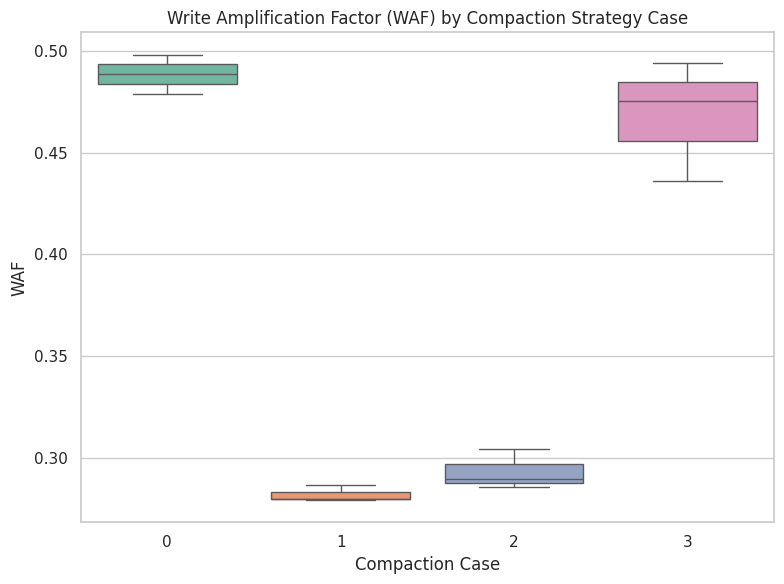

In [37]:
# ------------------------------------
# 1. WAF by Compaction Case
# ------------------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='WAF', data=df, hue='case', palette='Set2', legend=False)

plt.title('Write Amplification Factor (WAF) by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('WAF')
plt.tight_layout()
plt.show()

In [38]:
df.groupby('case')['WAF'].describe()

/tmp/ipykernel_9927/1438787012.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('case')['WAF'].describe()


,count,mean,std,min,25%,50%,75%,max
case,,,,,,,,
0,3.0,0.488568,0.009786,0.478630,0.483754,0.488878,0.493536,0.498195
1,3.0,0.281769,0.003993,0.279132,0.279472,0.279812,0.283088,0.286363
2,3.0,0.293097,0.009858,0.285525,0.287524,0.289522,0.296883,0.304243
3,3.0,0.468447,0.029716,0.435895,0.455610,0.475324,0.484723,0.494122


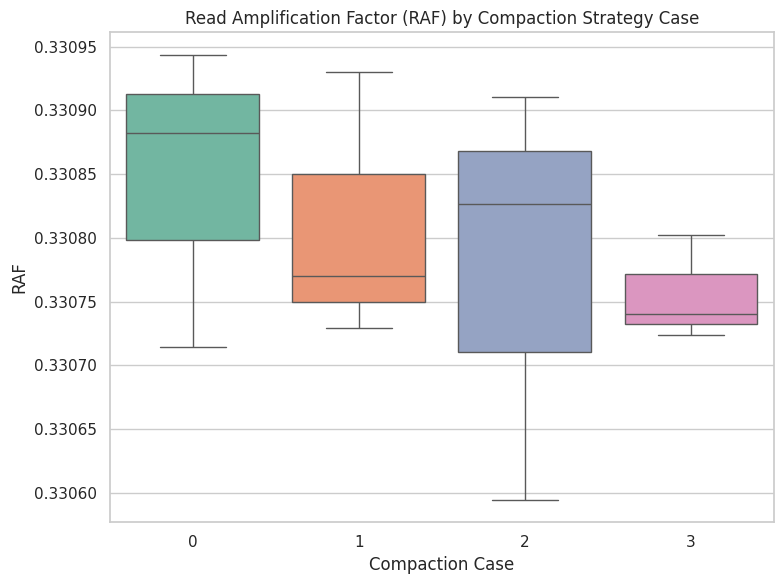

In [39]:
# ------------------------------------
# RAF by Compaction Case
# ------------------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='RAF', data=df, hue='case', palette='Set2', legend=False)

plt.title('Read Amplification Factor (RAF) by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('RAF')
plt.tight_layout()
plt.show()

In [40]:
df.groupby('case')['RAF'].describe()

/tmp/ipykernel_9927/3976049628.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('case')['RAF'].describe()


,count,mean,std,min,25%,50%,75%,max
case,,,,,,,,
0,3.0,0.330847,0.000118,0.330715,0.330798,0.330882,0.330913,0.330944
1,3.0,0.330810,0.000106,0.330729,0.330750,0.330770,0.330850,0.330930
2,3.0,0.330777,0.000164,0.330594,0.330710,0.330827,0.330869,0.330910
3,3.0,0.330756,0.000041,0.330724,0.330732,0.330741,0.330771,0.330802


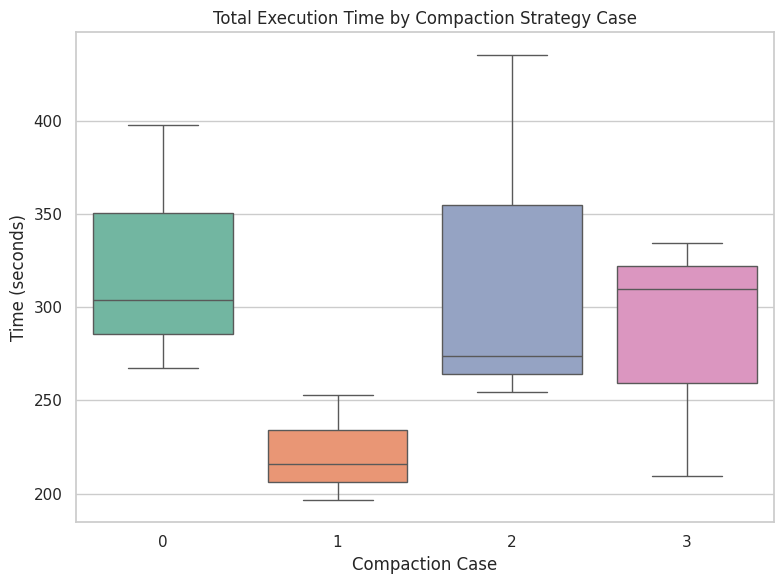

In [10]:
# ------------------------------------
# 2. 총 소요시간 by Case
# ------------------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='time(s)', data=df, hue='case', palette='Set2', legend=False)
plt.title('Total Execution Time by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Time (seconds)')
plt.tight_layout()
plt.show()

In [28]:
df.groupby('case')['time(s)'].describe()

/tmp/ipykernel_9927/2609622027.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('case')['time(s)'].describe()


,count,mean,std,min,25%,50%,75%,max
case,,,,,,,,
0,3.0,322.921333,67.250168,267.389,285.5345,303.680,350.6875,397.695
1,3.0,221.652667,28.554824,196.579,206.1125,215.646,234.1895,252.733
2,3.0,321.436000,99.383120,254.691,264.3275,273.964,354.8085,435.653
3,3.0,284.551667,66.392133,209.257,259.4840,309.711,322.1990,334.687


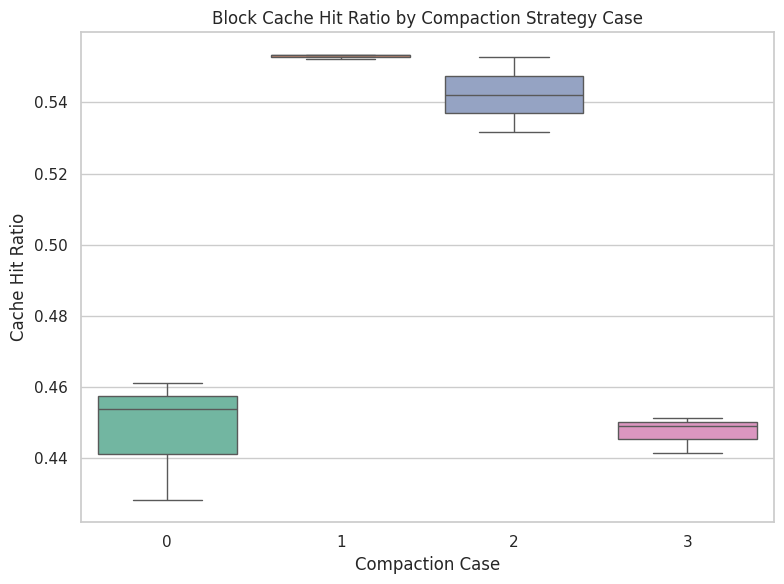

In [13]:
# ------------------------------------
# 3. Block Cache Hit Ratio by Case
# ------------------------------------
df['cache_hit_ratio'] = df['rocksdb.block.cache.hit'] / (
    df['rocksdb.block.cache.hit'] + df['rocksdb.block.cache.miss']
)

plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='cache_hit_ratio', data=df, hue='case', palette='Set2', legend=False)
plt.title('Block Cache Hit Ratio by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Cache Hit Ratio')
plt.tight_layout()
plt.show()

In [29]:
df.groupby('case')['cache_hit_ratio'].describe()

/tmp/ipykernel_9927/2933179225.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('case')['cache_hit_ratio'].describe()


,count,mean,std,min,25%,50%,75%,max
case,,,,,,,,
0,3.0,0.447845,0.017259,0.428351,0.441178,0.454006,0.457592,0.461179
1,3.0,0.552933,0.000690,0.552143,0.552691,0.553239,0.553328,0.553418
2,3.0,0.542177,0.010604,0.531558,0.536883,0.542208,0.547486,0.552765
3,3.0,0.447436,0.005130,0.441664,0.445417,0.449170,0.450322,0.451475


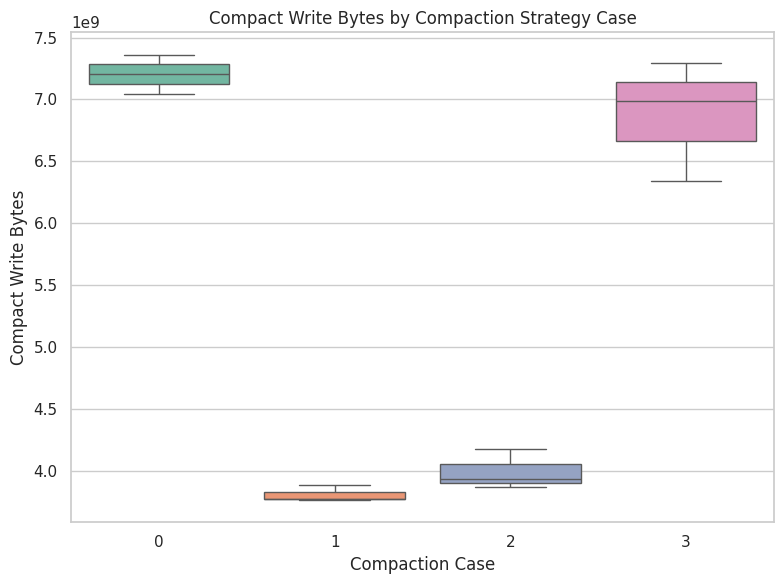

In [11]:
# ------------------------------------
# 4. Compact Write Bytes by Case
# ------------------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='rocksdb.compact.write.bytes', data=df, hue='case', palette='Set2', legend=False)
plt.title('Compact Write Bytes by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Compact Write Bytes')
plt.tight_layout()
plt.show()


In [30]:
df.groupby('case')['rocksdb.compact.write.bytes'].describe()

/tmp/ipykernel_9927/2492806515.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('case')['rocksdb.compact.write.bytes'].describe()


,count,mean,std,min,25%,50%,75%,max
case,,,,,,,,
0,3.0,7.204316e+09,1.605239e+08,7.041300e+09,7.125360e+09,7.209421e+09,7.285823e+09,7.362226e+09
1,3.0,3.811372e+09,6.549184e+07,3.768129e+09,3.773697e+09,3.779266e+09,3.832994e+09,3.886722e+09
2,3.0,3.997216e+09,1.617203e+08,3.873078e+09,3.905775e+09,3.938471e+09,4.059284e+09,4.180098e+09
3,3.0,6.875254e+09,4.880044e+08,6.340017e+09,6.665140e+09,6.990263e+09,7.142872e+09,7.295481e+09


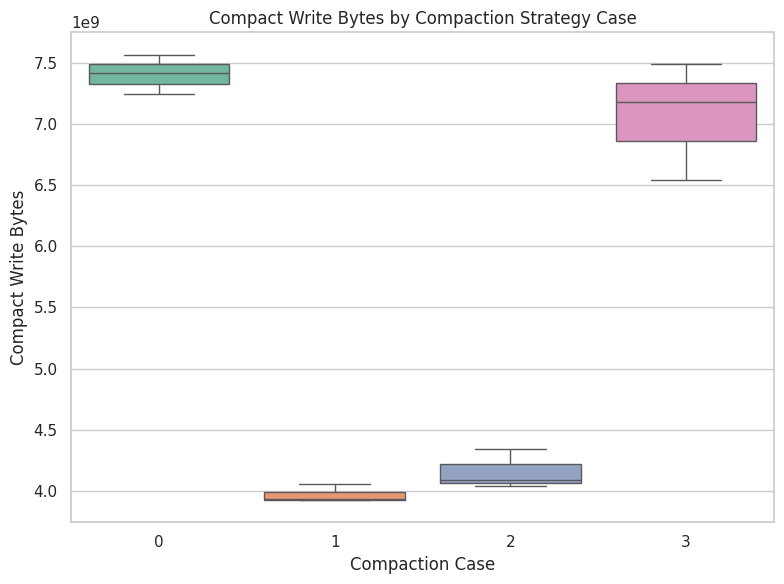

In [ ]:
# ------------------------------------
# 5. Compact Read Bytes by Case
# ------------------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='rocksdb.compact.read.bytes', data=df, hue='case', palette='Set2', legend=False)
plt.title('Compact Write Bytes by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Compact Write Bytes')
plt.tight_layout()
plt.show()


In [31]:
df.groupby('case')['rocksdb.compact.read.bytes'].describe()

/tmp/ipykernel_9927/1508819108.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('case')['rocksdb.compact.read.bytes'].describe()


,count,mean,std,min,25%,50%,75%,max
case,,,,,,,,
0,3.0,7.408925e+09,1.616662e+08,7.244699e+09,7.329435e+09,7.414171e+09,7.491037e+09,7.567904e+09
1,3.0,3.969438e+09,7.173745e+07,3.925578e+09,3.928044e+09,3.930511e+09,3.991367e+09,4.052224e+09
2,3.0,4.158787e+09,1.618743e+08,4.040228e+09,4.066575e+09,4.092921e+09,4.218066e+09,4.343210e+09
3,3.0,7.070422e+09,4.847779e+08,6.539389e+09,6.860993e+09,7.182597e+09,7.335938e+09,7.489278e+09


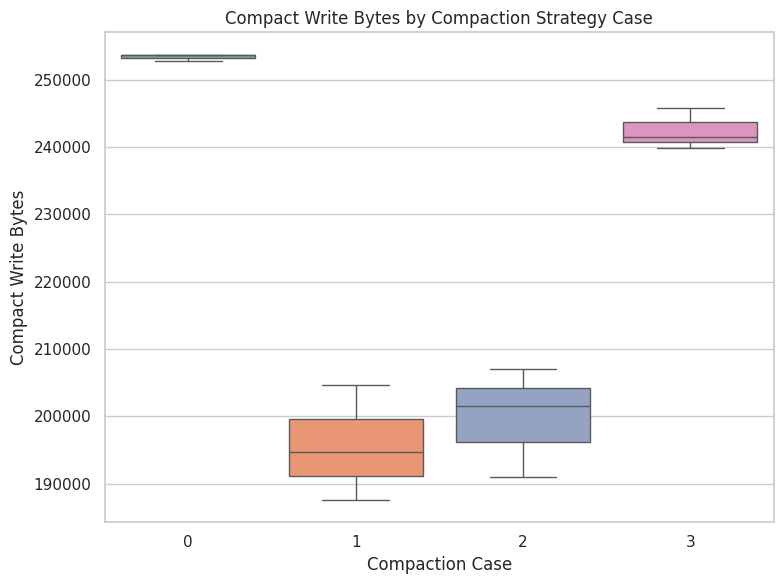

In [32]:
# ------------------------------------
# 6. Compact Read Bytes by Case
# ------------------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='rocksdb.compaction.key.drop.new', data=df, hue='case', palette='Set2', legend=False)
plt.title('Compact Write Bytes by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Compact Write Bytes')
plt.tight_layout()
plt.show()


In [33]:
df.groupby('case')['rocksdb.compaction.key.drop.new'].describe()

/tmp/ipykernel_9927/586805925.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('case')['rocksdb.compaction.key.drop.new'].describe()


,count,mean,std,min,25%,50%,75%,max
case,,,,,,,,
0,3.0,253378.666667,507.346364,252794.0,253216.5,253639.0,253671.0,253703.0
1,3.0,195624.000000,8586.736516,187574.0,191105.0,194636.0,199649.0,204662.0
2,3.0,199816.000000,8159.054786,190946.0,196223.5,201501.0,204251.0,207001.0
3,3.0,242386.666667,3113.850724,239783.0,240662.0,241541.0,243688.5,245836.0
